
# Semantic Image Segmentation with ICNet

A Core ML compatible implementation of semantic segmentation with ICNet in Keras.

# Semantic Segmentation of Images
Semantic segmentation assigns a class label to eat individual pixel of an image. Semantic segmentation is an important component of applications like autonomous driving and augmented reality.

The Image Cascade Network (ICNet) architecture was introduced by Zhao et al as an optimization on their Pyramid Scene Parsing Network (PSPNet) capable of segmenting images in real-time.

Here, we take a Keras implementation of ICNet, train it to segment various classes from the ADE20K dataset, and convert the model to Apple's Core ML format for use in mobile apps.


## Example - Living Room Objects

<img src="https://github.com/fritzlabs/fritz-image-segmentation/blob/master/examples/living_room.jpg?raw=true" width="300" height="200">
<img src="https://github.com/fritzlabs/fritz-image-segmentation/blob/master/examples/example_image_and_mask.png?raw=true" width="300" height="200">
<img src="https://github.com/fritzlabs/fritz-image-segmentation/blob/master/examples/example_pixel_probabilities.png?raw=true" width="500" height="500">

Download the [mlmodel](https://github.com/fritzlabs/fritz-image-segmentation/blob/master/examples/icnet_768x768_indoor.mlmodel).


## Benchmarks
On a Google Cloud Compute GPU instance with a single K80, a single epoch containing roughly 1600 768x768 images takes 20 minutes. Average cross-categorical accuracy reached >80% after 12 hours. An additional 3 hours of training with a learning rate of 0.00001 increased accuracy to ~87%. Inferences with a 768x768 model can be made at 8-9fps on an iPhone X.


## Additional resources

* [Original ICNet Implementation](https://github.com/hszhao/ICNet)
* [Keras-ICNet](https://github.com/aitorzip/Keras-ICNet)
* [ICNet-tensorflow](https://github.com/hellochick/ICNet-tensorflow)

# Getting Started
Clone this repo and navigate to the fritz-image-segmentation/examples/ folder and start jupyter.

```
git clone git@github.com:fritzlabs/fritz-image-segmentation.git
cd fritz-image-segmentation/examples/
jupyter notebook
```

In [1]:
# Add the repo to your path
import sys
sys.path.append('../')

## Install Dependencies
Feel free to skip if you already have these dependencies installed

In [2]:
# Execute pip as a shell command
!pip install -r ../requirements.txt

  Using cached https://files.pythonhosted.org/packages/69/d5/dff2a8f7658fd87ab3330a0ab47e4363681d8bdf734a495add65a347f5e3/h5py-2.7.1-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
    100% |████████████████████████████████| 4.7MB 4.6MB/s eta 0:00:01
^C
Operation cancelled by user


## Load the pre-trained living room model

In [2]:
from image_segmentation.icnet import ICNetModelFactory

Using TensorFlow backend.


In [3]:
icnet_living_room = ICNetModelFactory.build(
    img_size=768,
    n_classes=10,
    weights_path='icnet_768x768_living_room.h5',
    train=False
)

## Make a prediction

In [4]:
# Load some modules to help visualize data
import PIL.Image
import numpy
from image_segmentation import utils

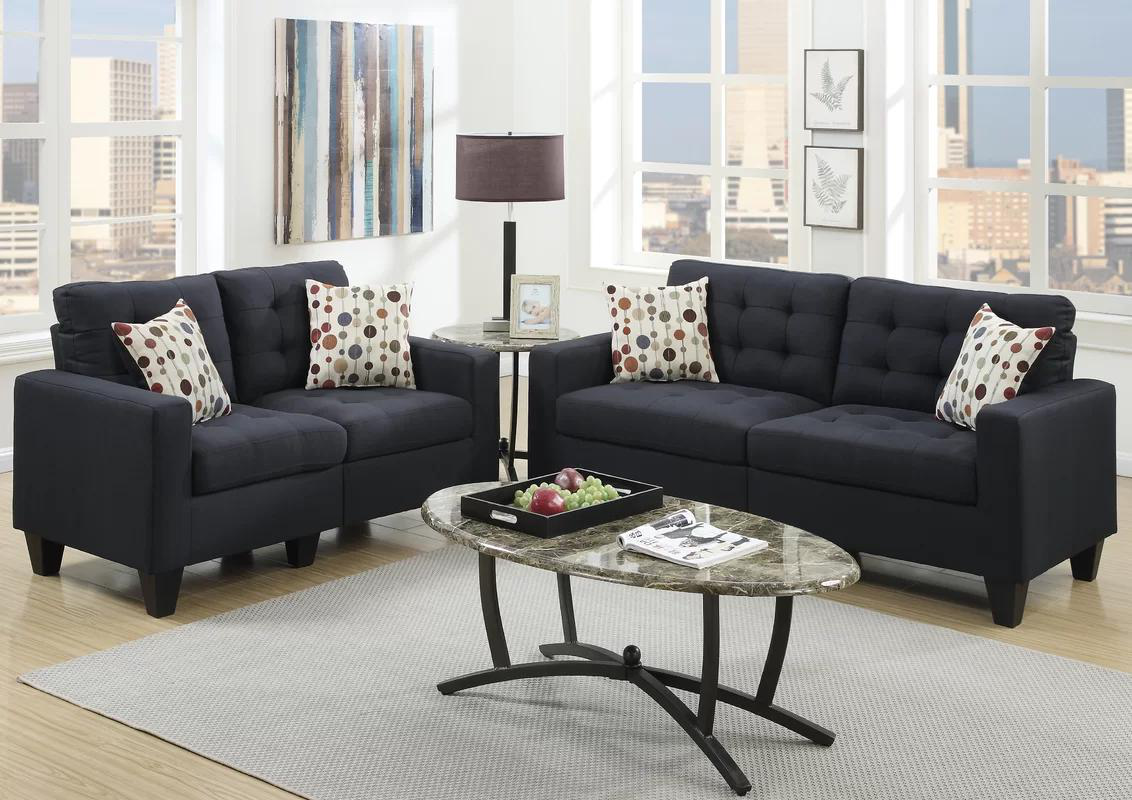

In [8]:
image = PIL.Image.open('living_room.jpg')
image

In [9]:
image = image.resize((768, 768))
image = numpy.array(image)[None, :, :, :]
# Preprocess
image = (image - 127.5) / 255.0
output = icnet_living_room.predict(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/jltoole/.pyenv/versions/3.6.2/envs/deep-learning-3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/jltoole/.pyenv/versions/3.6.2/envs/deep-learning-3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


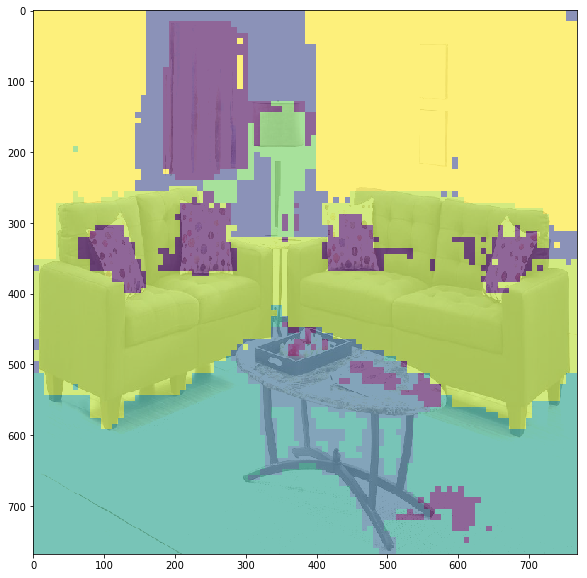

In [6]:
plt = utils.plot_image_and_mask(
    image[0],
    output[0],
    deprocess_func=lambda img: (img + 1.0) * 255.0
)

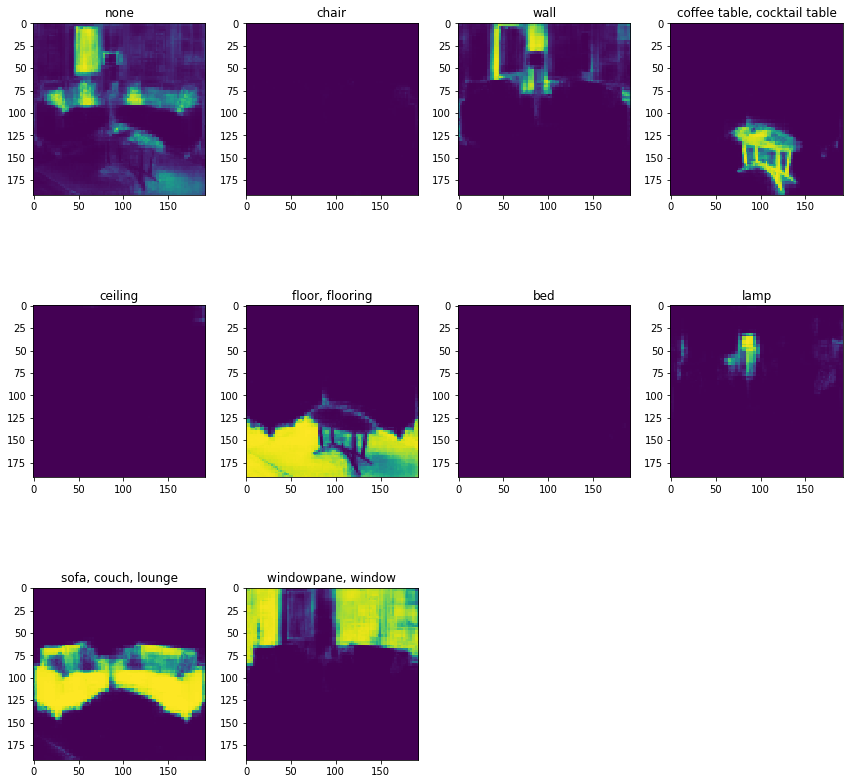

In [7]:
class_labels = [
    'none', 'chair', 'wall',
    'coffee table, cocktail table', 'ceiling',
    'floor, flooring', 'bed', 'lamp',
    'sofa, couch, lounge', 'windowpane, window'
]

plt = utils.plot_pixel_probabilities(
    output[0],
    class_labels
)

# Train your own model
For more information on training your own image segmentation model, visit the [repo](https://github.com/fritzlabs/fritz-image-segmentation).
